In [1]:
#Import of relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/titanic_train.csv")
df.head(3)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0


In [2]:
df.info() # To get an insight into the quality of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [3]:
#Count of missing values in each column
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

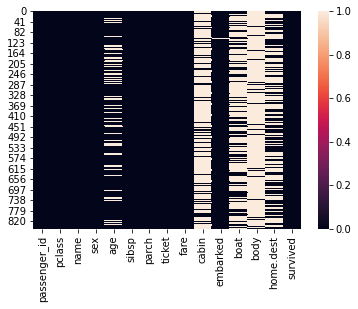

In [4]:
#Visualization of the missing values in each column
import seaborn as sns
plt.figure()
sns.heatmap(df.isna())

In [5]:
#List of columns
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

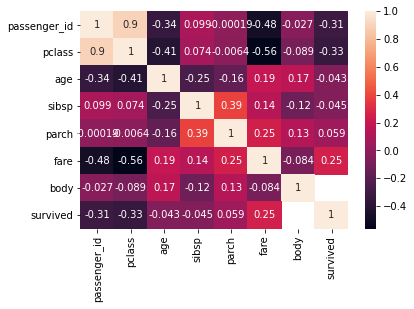

In [6]:
#Visualization of possible significant correlation between the dataset features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [7]:
#Definition of a new dataset
df_1 = df.drop(['pclass','name','cabin','boat','body','home.dest', 'ticket'], axis=1)
df_1.head(5)

,passenger_id,sex,age,sibsp,parch,fare,embarked,survived
0,1216,female,NaN,0,0,7.7333,Q,1
1,699,male,38.0,0,0,8.6625,S,0
2,1267,female,30.0,1,1,24.1500,S,0
3,449,female,54.0,1,3,23.0000,S,1
4,576,male,40.0,0,0,13.0000,S,0


In [8]:
# Identification of columns with missing values
df_1.isnull().sum()

passenger_id      0
sex               0
age             174
sibsp             0
parch             0
fare              1
embarked          1
survived          0
dtype: int64

In [9]:
#Replacement of the missing values with the mean of respective features
mean_age = int(df_1['age'].mean())
df_1['age'] = np.where(df_1['age'].isna()==True, mean_age, df_1['age'])

mean_fare = int(df_1['fare'].mean())
df_1['fare'] = np.where(df_1['fare'].isna()==True, mean_fare, df_1['age'])



In [10]:
#Identification of columns with missing values
df_1.isnull().sum()

passenger_id    0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        1
survived        0
dtype: int64

In [11]:
#Removal of rows with missing values
df_1.dropna(inplace=True)

In [12]:
# We verify if we still have columns with missing values
df_1.isnull().sum()

passenger_id    0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
survived        0
dtype: int64

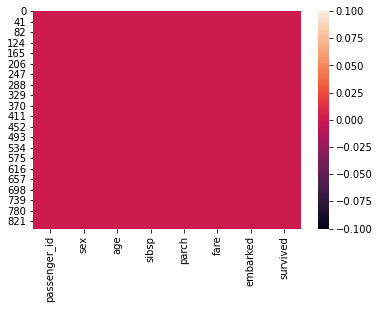

In [13]:
#Further verification of non-missing values
plt.figure()
sns.heatmap(df_1.isna())

In [14]:
# Label Encoding of the categorical data
from sklearn import preprocessing 
le =preprocessing.LabelEncoder()
le.fit(df_1['sex'])
df_1['sex'] = le.transform(df_1['sex'])
df_1

,passenger_id,sex,age,sibsp,parch,fare,embarked,survived
0,1216,0,29.0,0,0,29.0,Q,1
1,699,1,38.0,0,0,38.0,S,0
2,1267,0,30.0,1,1,30.0,S,0
3,449,0,54.0,1,3,54.0,S,1
4,576,1,40.0,0,0,40.0,S,0
...,...,...,...,...,...,...,...,...
845,158,1,55.0,0,0,55.0,S,0
846,174,1,58.0,0,0,58.0,C,0
847,467,0,24.0,1,0,24.0,S,1
848,1112,0,3.0,1,1,3.0,S,0


In [15]:
# Label Encoding of the categorical data
le_1 =preprocessing.LabelEncoder()
le_1.fit(df_1['embarked'])
df_1['embarked'] = le_1.transform(df_1['embarked'])
df_1.head(5)

,passenger_id,sex,age,sibsp,parch,fare,embarked,survived
0,1216,0,29.0,0,0,29.0,1,1
1,699,1,38.0,0,0,38.0,2,0
2,1267,0,30.0,1,1,30.0,2,0
3,449,0,54.0,1,3,54.0,2,1
4,576,1,40.0,0,0,40.0,2,0


In [16]:
#For a faster processing, we change all the data types to int32
df_1 = df_1.astype('int32')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   passenger_id  849 non-null    int32
 1   sex           849 non-null    int32
 2   age           849 non-null    int32
 3   sibsp         849 non-null    int32
 4   parch         849 non-null    int32
 5   fare          849 non-null    int32
 6   embarked      849 non-null    int32
 7   survived      849 non-null    int32
dtypes: int32(8)
memory usage: 33.2 KB


### Date Visualization

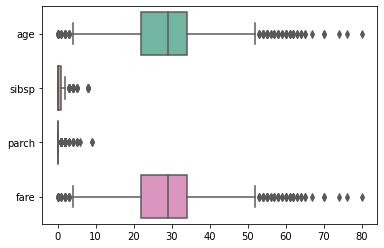

In [17]:
#Outlier Detection

data =df_1.loc[:,'age':'fare']
ax = sns.boxplot(data=data, orient="h", palette="Set2")
#ax.set_xlabel( fontweight='bold')

In [18]:
'''
# We create a function that returns the boundaries of the distribution 

def outliers_detection(value, Q1, Q3):
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  return value <= lower or value >= upper 

# Then we construct a function that will return the index(es) of detected outlier(s)

def outliers_position(values):
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)

  Outlier =[]
  for ind, value in enumerate(values):
    if outliers_detection(value, Q1, Q3):
      Outlier.append(ind)
  return Outlier 

#The following lines of codes provide the value of the identified outlier(s)

def outliers_value(values):
  Q1 = np.percentile(values, 25)
  Q3 = np.percentile(values, 75)

  O_value =[]
  for ind, value in enumerate(values):
    if outliers_detection(value, Q1, Q3):
      O_value.append(value)
  return O_value 
  '''

'\n# We create a function that returns the boundaries of the distribution \n\ndef outliers_detection(value, Q1, Q3):\n  IQR = Q3 - Q1\n  lower = Q1 - 1.5*IQR\n  upper = Q3 + 1.5*IQR\n  return value <= lower or value >= upper \n\n# Then we construct a function that will return the index(es) of detected outlier(s)\n\ndef outliers_position(values):\n  Q1 = np.percentile(values, 25)\n  Q3 = np.percentile(values, 75)\n\n  Outlier =[]\n  for ind, value in enumerate(values):\n    if outliers_detection(value, Q1, Q3):\n      Outlier.append(ind)\n  return Outlier \n\n#The following lines of codes provide the value of the identified outlier(s)\n\ndef outliers_value(values):\n  Q1 = np.percentile(values, 25)\n  Q3 = np.percentile(values, 75)\n\n  O_value =[]\n  for ind, value in enumerate(values):\n    if outliers_detection(value, Q1, Q3):\n      O_value.append(value)\n  return O_value \n  '

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


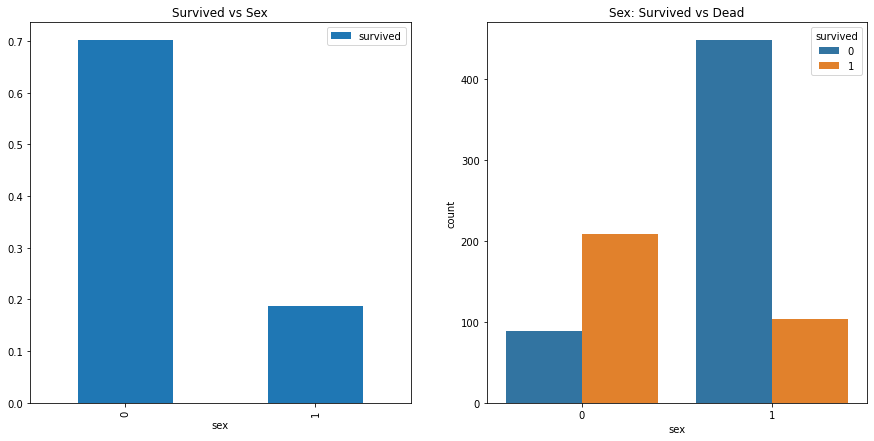

In [19]:
#Count of survivors with respect to sex

f, ax = plt.subplots(1, 2, figsize=(15, 7))
df_1[['sex','survived']].groupby(['sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('sex', hue='survived', data=df_1, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


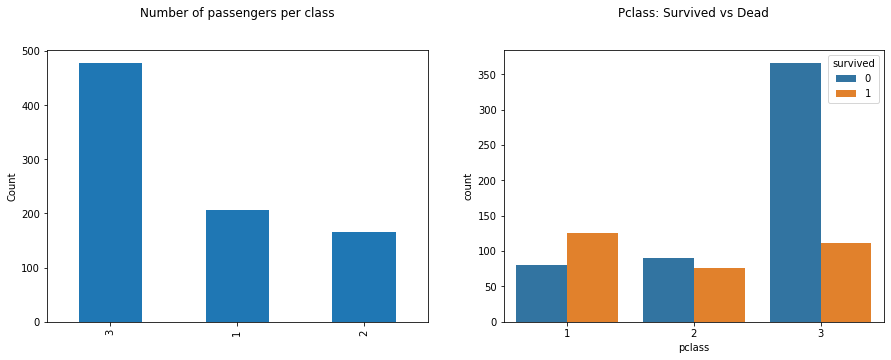

In [20]:
#Count of survivors with to boarding classes

y_position = 1.1
f, ax = plt.subplots(1, 2, figsize=(15,5))
df['pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers per class', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('pclass', hue='survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### Machine Learning

In [21]:
#Let's divide our data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler

x = df_1.drop(['survived'], axis=1)
y = df_1['survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


In [22]:
#Import relevant models and metrics

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing  import StandardScaler

In [23]:
# Model definition:
base_models = [("SVM",      SVC()),                                                               #Support Vector Machines
               ("kNN",      KNeighborsClassifier(n_neighbors = 3)),                               #KNeighborsClassifier
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),                       #Logistic Regression model
               ("DT_model", DecisionTreeClassifier(random_state=42)),                             #Decision tree model
               ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),                  #Random Forest model
               ("XGBoost", XGBClassifier()),                                                      #XGBoost model
               ("Bagging_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),        #Bagging model
                                                 max_samples=30,
                                                 n_estimators=500,
                                                 n_jobs=-1,
                                                 bootstrap=True,
                                                 oob_score=True)),
               ("Random_subspaces_model",BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random subspaces model
                                                           n_estimators=100,
                                                           bootstrap=False,
                                                           max_samples=1.0,
                                                           max_features=True,
                                                           bootstrap_features=True,
                                                           n_jobs=-1)),
                ("Random_Patches_model", BaggingClassifier(base_estimator=DecisionTreeClassifier(),#Random Patches model
                                                            n_estimators=100,
                                                            bootstrap=True,
                                                            max_samples=1.0,
                                                            max_features=True,
                                                            bootstrap_features=True,
                                                            n_jobs=-1)),
                ("AdaBoost_model",AdaBoostClassifier(DecisionTreeClassifier(),                      #AdaBoost model
                                                    n_estimators=100,
                                                    learning_rate=0.01)),
                ("GradientBoosting",GradientBoostingClassifier(max_depth=2,                        #GradientBoosting model
                                                              n_estimators=100))]


In [24]:
kfolds = 5   # it is better to be 1/(size of testing test)
split = StratifiedKFold(n_splits=kfolds,
                        shuffle=True, 
                        random_state=42)  
# shuffle is required to ensure random distribution of data

# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'min_score':{},'max_score':{},'mean_score':{},'std_dev':{}}
for name, model in base_models:
    # get cross validation score for each model:
    cv_results = cross_val_score(model, 
                                 x, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    
    # output:
    #To find the average of all the accuracies.
    min_score = round(min(cv_results)*100, 4)
    models_data['min_score'][name] = min_score
     
    #To find the max accuracy of all the accuracies.
    max_score = round(max(cv_results)*100, 4)
    models_data['max_score'][name] = max_score
    
    #To find the min accuracy of all the accuracies.
    mean_score = round(np.mean(cv_results)*100, 4)
    models_data['mean_score'][name] = mean_score
    
    # let's find the standard deviation of the data to see degree of variance in the results obtained by our model.
    std_dev = round(np.std(cv_results), 4)
    models_data['std_dev'][name] = std_dev
    
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) ---> min: {min_score}, max: {max_score}")

SVM cross validation accuarcy score: 68.4316 +/- 0.0202 (std) ---> min: 65.8824, max: 71.7647
kNN cross validation accuarcy score: 67.7306 +/- 0.0292 (std) ---> min: 62.3529, max: 71.0059
LR_model cross validation accuarcy score: 78.7901 +/- 0.0373 (std) ---> min: 71.5976, max: 81.7647
DT_model cross validation accuarcy score: 78.2088 +/- 0.0125 (std) ---> min: 77.0588, max: 80.5882
RF_model cross validation accuarcy score: 80.6829 +/- 0.0198 (std) ---> min: 78.2353, max: 84.1176
XGBoost cross validation accuarcy score: 81.1521 +/- 0.0121 (std) ---> min: 79.2899, max: 82.9412
Bagging_model cross validation accuarcy score: 80.7964 +/- 0.0217 (std) ---> min: 76.9231, max: 83.5294
Random_subspaces_model cross validation accuarcy score: 68.4337 +/- 0.0292 (std) ---> min: 65.2941, max: 72.9412
Random_Patches_model cross validation accuarcy score: 67.7292 +/- 0.0284 (std) ---> min: 63.5294, max: 71.7647
AdaBoost_model cross validation accuarcy score: 77.2684 +/- 0.0211 (std) ---> min: 74.705

In [25]:
# Tabulation of the model o
models_output = pd.DataFrame(models_data).sort_values(by='mean_score',ascending=False)
models_output

,min_score,max_score,mean_score,std_dev
XGBoost,79.2899,82.9412,81.1521,0.0121
GradientBoosting,78.1065,83.5294,80.7978,0.0209
Bagging_model,76.9231,83.5294,80.7964,0.0217
RF_model,78.2353,84.1176,80.6829,0.0198
LR_model,71.5976,81.7647,78.7901,0.0373
DT_model,77.0588,80.5882,78.2088,0.0125
AdaBoost_model,74.7059,80.5882,77.2684,0.0211
Random_subspaces_model,65.2941,72.9412,68.4337,0.0292
SVM,65.8824,71.7647,68.4316,0.0202
kNN,62.3529,71.0059,67.7306,0.0292


In [26]:
#let's compare the accuracies of our models
accuracies = {}
models = {}
model = base_models
for name,model in base_models:
    model.fit(X_train, y_train)
    models[name]=model
    acc = model.score(X_test, y_test)*100
    accuracies[name] = acc
    print("{} Accuracy Score : {:.2f}%".format(name,acc))

SVM Accuracy Score : 67.65%
kNN Accuracy Score : 65.29%
LR_model Accuracy Score : 81.18%
DT_model Accuracy Score : 83.53%
RF_model Accuracy Score : 85.29%
XGBoost Accuracy Score : 84.12%
Bagging_model Accuracy Score : 84.12%
Random_subspaces_model Accuracy Score : 64.12%
Random_Patches_model Accuracy Score : 67.06%
AdaBoost_model Accuracy Score : 83.53%
GradientBoosting Accuracy Score : 84.12%


In [27]:
#Tabulation of the performance of models
models_df = pd.DataFrame(data=accuracies.items())
models_df.columns = ['Model','Test score']
models_df.sort_values('Test score',ascending=False)


,Model,Test score
4,RF_model,85.294118
5,XGBoost,84.117647
6,Bagging_model,84.117647
10,GradientBoosting,84.117647
3,DT_model,83.529412
9,AdaBoost_model,83.529412
2,LR_model,81.176471
0,SVM,67.647059
8,Random_Patches_model,67.058824
1,kNN,65.294118
